# Lab B (77335) - Polarization
Kai Carmin and Amir Weill


In [1]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import pandas as pd
import openpyxl as xl
import os

## Data Handling Functions

All the data is in .xlsx format with 5 first rows not relevant - this function take a directory and number of rows and delete those rows in all the files in the directory.

In [2]:
def delete_first_n_rows_in_excel(directory, n):
    with os.scandir(directory) as it:
        for file in it:
            excel_file = xl.load_workbook(file)
            excel_sheet = excel_file['Sheet1']
            excel_sheet.delete_rows(idx=1, amount=n)
            excel_file.save(directory+'\\'+file.name)
            excel_file.close()

Each collection of data in a setup has a directory, and beacouse all our setups are current as a function of time for some angle we named the files for each measurment "<angle>.xlsx". This function takes a directory and return a Data Frame with columns:
* 'Angle' - the angle in radians taken from the file name
* 'Current' - mean of current measured
* 'Angle Error' - constant angle error based on our insturment for measurment
* 'Current std' - standard deviation of the current measurment
We return the Data Frame sorted by the angles.

In [3]:
def get_data_with_error(directory):
    Theta_I = pd.DataFrame(columns=['Angle', 'Current', 'Angle Error', 'Current std'], dtype='float64')
    with os.scandir(directory) as it:
        for file in it:
            data = pd.read_excel(file)
            angle = int(file.name.split(".")[0])
            new_point = {'Angle':np.deg2rad(angle), 'Current':data['Current (A)'].mean(), 
                        'Angle Error':1/180, 'Current std':data['Current (A)'].std(),}
            Theta_I = Theta_I.append(new_point, ignore_index=True)
            #pd.concat([Theta_I, pd.DataFrame(new_point)])
    Theta_I = Theta_I.sort_values('Angle')
    return Theta_I

To print the fit estimated parameters and calculate the r-squared value:

In [4]:
def fit_r_squared(fit_func, x, y, popt):
    residuals = y - fit_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum(y-np.mean(y)**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def print_fit_parameters(fit_func, popt, pcov, x, y):
    for i in range(0, len(popt)):
        print(f'{popt[i]} +- {pcov[i][i]}')
    print(f'fit R-Squared = {fit_r_squared(fit_func, x, y, popt)}')

## Part 2 - Malus law with two polarizers


We will use Malus law: $$ I=I_0\cos^2{\theta} $$
to find the light magnitude of polarized light as a function of the angle between two polarizers.</br>
**In this part we had a lack of time and measured only 6 angles with small steps, so we couldny fit our data.** </br>
note: on this part  we didnt use the data handling function because we srote those later, but it can be easily modified...

In [135]:
def MalusLaw(theta):
  return (np.cos(theta*np.pi + np.pi/2))**2

In [ ]:
# Data calculation
Theta_I_mallus2 = pd.DataFrame(columns=['Angle', 'Current', 'Angle Error', 'Current std'], dtype='float64')
for i in [0, 6, 11, 16, 21, 26]:
    data = pd.read_excel(f'Day1//theta{i}.xlsx')
    new_point = {'Angle':i/180, 'Current':data['Current (A)'].mean(), 
                 'Angle Error':1/180, 'Current std':data['Current (A)'].std(),}
    Theta_I_mallus2 = Theta_I_mallus2.append(new_point, ignore_index=True)
    #pd.concat([Theta_I, pd.DataFrame(new_point)])

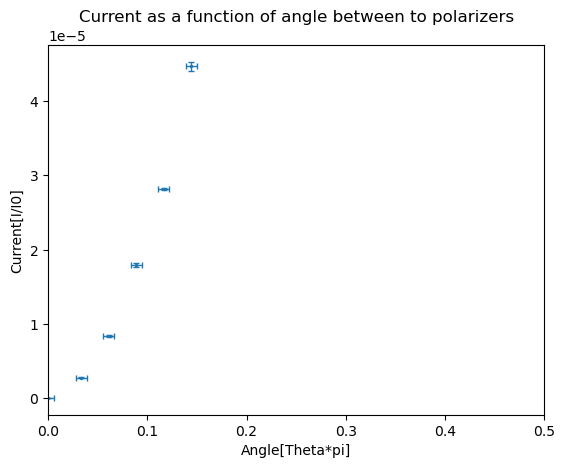

In [138]:

plt.figure()

plt.scatter(Theta_I_mallus2['Angle'], Theta_I_mallus2['Current'], s=2)
plt.errorbar(Theta_I_mallus2['Angle'], Theta_I_mallus2['Current'],
                yerr=Theta_I_mallus2['Current std'], xerr=Theta_I_mallus2['Angle Error'],
                elinewidth=1, capsize=2, linestyle='None')

# plot details
# plt.ylim([0,1])
plt.xlim([0,0.5])
plt.xlabel('Angle[Theta*pi]')
plt.ylabel('Current[I/I0]')
plt.title('Current as a function of angle between to polarizers')
# plt.legend()
plt.show()
# plt.savefig("mallus two polarizers attempt 1.pdf", format="pdf", bbox_inches="tight")

## Part 3 - Mallus law with three polarizers

In [ ]:
dir = 'enter data directory'

In [110]:
if False: # changed to false so it wont run again by excident
    delete_first_n_rows_in_excel(dir, 5)

In [139]:
def mallus_3_polariizers(theta, I0, alpha):
    return (0.25*I0**2)*((np.sin(2*theta + alpha))**2)
    #return I0*(np.cos(theta)**2) * (np.sin(theta)**2)

In [ ]:
Theta_I_mallus3 = get_data_with_error(dir+'\\malus 3')

0.9952832515422897
[[3.72677361e-09 5.67134195e-11]
 [5.67134195e-11 7.66086270e-05]]


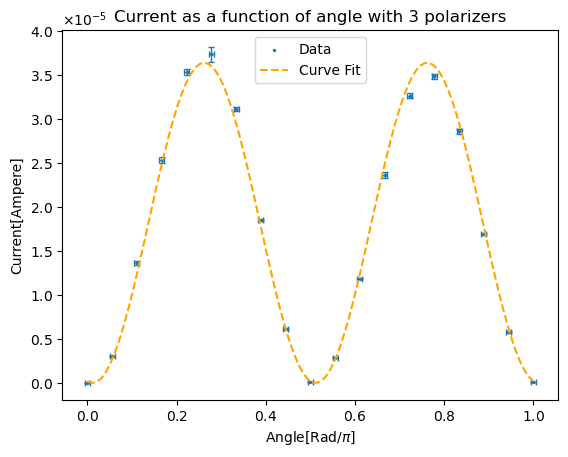

In [141]:
plt.scatter(Theta_I_mallus3['Angle']/np.pi, Theta_I_mallus3['Current'], s=2, label='Data')
plt.errorbar(Theta_I_mallus3['Angle']/np.pi, Theta_I_mallus3['Current'],
                yerr=Theta_I_mallus3['Current std'], xerr=Theta_I_mallus3['Angle Error'],
                elinewidth=1, capsize=2, linestyle='None')

# curve fit
theta_fit = np.linspace(0, np.pi, 100 ,endpoint=True)
popt, pcov  = curve_fit(mallus_3_polariizers, Theta_I_mallus3['Angle'], Theta_I_mallus3['Current'])
# r-value
residuals = Theta_I_mallus3['Current'] - mallus_3_polariizers(Theta_I_mallus3['Angle'], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Theta_I_mallus3['Current']-np.mean(Theta_I_mallus3['Current']))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

plt.plot(theta_fit/np.pi, mallus_3_polariizers(theta_fit, *popt),
         color='orange', linestyle='dashed', label=f'Curve Fit')
print(pcov)

# plot details
plt.xlabel('Angle[Rad/$\pi$]')
plt.ylabel('Current[Ampere]')
plt.ticklabel_format(useMathText=True)
plt.title('Current as a function of angle with 3 polarizers')
plt.legend()
plt.show()
# plt.savefig("mallus two polarizers attempt 1.pdf", format="pdf", bbox_inches="tight")

## Part 4 - Quarter Wave Plate

### Simulation

An attempt to simulate the behaviour of the system

In [143]:
def simulation(alpha, A, beta, phi):
    return A*(np.cos(beta)*np.sin(alpha+phi)**2 + np.cos(beta+phi)*np.cos(alpha + np.pi/2)**2)

In [144]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

## Definition of the plot_cos function, our "callback function".
def simulate_quarter_plate( A, beta, phi):
    ## Plot parameters
    xmin, xmax, nx = 0.0, 2*np.pi, 100

    ## Plot the figure
    x = np.linspace(xmin, xmax, nx)
    E = simulation(x, A, beta, phi)
    # E1 = first_polarizer(E0, theta1)
    # E2 = quarter_plate(E1, theta2)
    # E3 = second_polarizer(E2, x)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='polar')
    ax.plot(x, E)
    plt.title("title")

## Generate our user interface.
interact(simulate_quarter_plate,
         A=FloatSlider(min=0, max=0.1, step=0.01, value=0.01),
         beta=FloatSlider(min=0, max=2*np.pi, step=0.1*np.pi, value=0.0),
         phi=FloatSlider(min=0, max=2*np.pi, step=0.1*np.pi, value=0.0));

interactive(children=(FloatSlider(value=0.01, description='A', max=0.1, step=0.01), FloatSlider(value=0.0, des…

### Data

In [ ]:
dir = ' enter data directory'

In [31]:
if False: 
    for setup in ['quarter linear', 'quarter eliptical', 'quarter circular', 'q plate 45 deg']:
        delete_first_n_rows_in_excel(dir + setup, 5)

In [ ]:
Theta_I_quarter_plate_linear = get_data_with_error(dir+'quarter linear')
Theta_I_quarter_plate_eliptical = get_data_with_error(dir+'quarter eliptical')
Theta_I_quarter_plate_circular = get_data_with_error(dir+'quarter circular')

In [150]:
def quarter_plate_polarization(alpha, A, beta, phi):
    #return A*((np.cos(alpha-beta)**2)*np.cos(np.pi/2 - alpha - gamma)**2) + c
    return A*(np.cos(beta)*np.sin(alpha+phi)**2 + np.cos(beta+phi)*np.cos(alpha + np.pi/2)**2)

In [151]:
def plot_polar(r, theta, r_error, theta_error, title):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='polar')
    
    # plot data
    ax.errorbar(theta, r, xerr=theta_error, yerr=r_error, capsize=7, fmt="o") 
    
    #plot fit
    theta_fit = np.linspace(0, 2*np.pi, 100 ,endpoint=True)
    #custom_quarter_plate = lambda theta, r: quarter_plate_polarization(theta, r, beta)
    popt, pcov  = curve_fit(quarter_plate_polarization, theta, r)
    print_fit_parameters(quarter_plate_polarization, popt, pcov, theta, r)
    ax.plot(theta_fit, quarter_plate_polarization(theta_fit, *popt),
            color='orange', linestyle='dashed', label=f'Curve Fit: I = {popt[0]:.4f}')

    # plt.ylim(0,0.00025)
    ax.set_title(title)
    plt.legend()
    plt.plot()

0.00021339602522129248 +- 6.232976755010857e-12
-0.020422803696627422 +- 0.00022416646518752122
1.5947842266900327 +- 9.244847505521417e-05
fit R-Squared = 0.9999998219832847


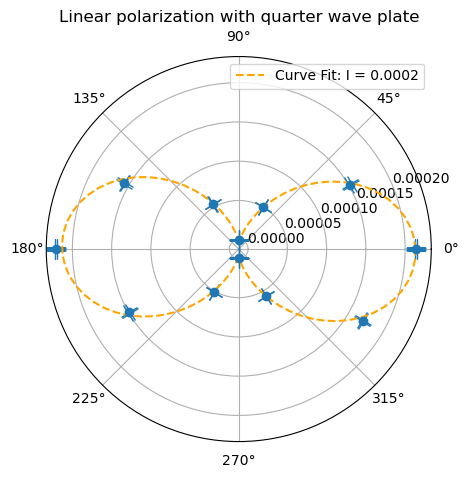

In [152]:

plot_polar(Theta_I_quarter_plate_linear['Current'], Theta_I_quarter_plate_linear['Angle'], 
           Theta_I_quarter_plate_linear['Current std'], Theta_I_quarter_plate_linear['Angle Error'], 
           'Linear polarization with quarter wave plate')

0.00020467004454801174 +- 5.620038384254853e-12
0.33996587532328415 +- 0.00020986539479673144
1.1279662464573819 +- 4.904279809530167e-05
fit R-Squared = 0.9999999425651402


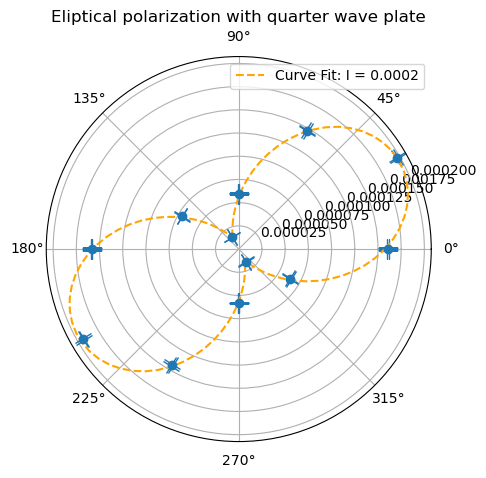

In [153]:
plot_polar(Theta_I_quarter_plate_eliptical['Current'], Theta_I_quarter_plate_eliptical['Angle'], 
           Theta_I_quarter_plate_eliptical['Current std'], Theta_I_quarter_plate_eliptical['Angle Error'], 
           'Eliptical polarization with quarter wave plate')

-0.0001531575623892453 +- 3.09188499725492e-12
2.316826686163874 +- 0.00017980428544087123
1.6088624542746435 +- 0.0001878044619898686
fit R-Squared = 0.9999999117896655


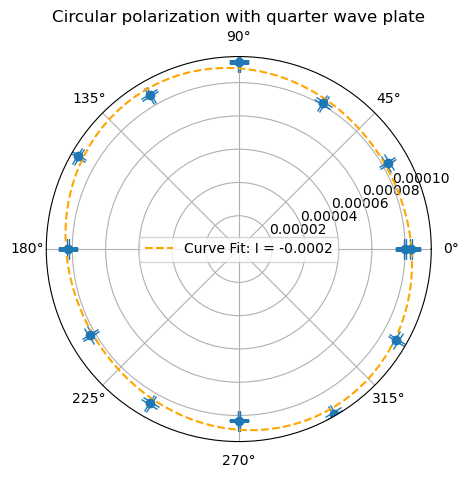

In [154]:
plot_polar(Theta_I_quarter_plate_circular['Current'], Theta_I_quarter_plate_circular['Angle'], 
           Theta_I_quarter_plate_circular['Current std'], Theta_I_quarter_plate_circular['Angle Error'], 
           'Circular polarization with quarter wave plate')

## Part 5 - Scattering from Dialectric material

In [155]:
dir = 'enter data directory'
setups = ['Dialectric R Parallel - 234', 'Dialectric R Perpendicular - 144', 'Dialectric R Both - 189']

In [25]:
if False: 
    for setup in setups:
        delete_first_n_rows_in_excel(dir + setup, 5)

In [ ]:
setups_data = []
for setup in setups:
    setups_data.append(get_data_with_error(dir+setup))

In [157]:
def snell_law(theta_i, n_t):
    return np.arcsin(np.sin(theta_i)/n_t)

In [158]:
def R_Parallel(theta_i, n_t, A):
    return A*(np.tan(theta_i-(snell_law(theta_i, n_t))))**2/(np.tan(theta_i+(snell_law(theta_i, n_t))))**2

def R_Perpendicular(theta_i, n_t, A):
    return A*(np.sin(theta_i-snell_law(theta_i, n_t))**2)/np.sin(theta_i+snell_law(theta_i, n_t))**2

def R_Both(theta_i, n_t, A):
    return 0.5*(R_Parallel(theta_i, n_t, A)+R_Perpendicular(theta_i, n_t, A))


setup - R Parallel - $234^{\circ}$
 n_t, A:
1.5 +- 0.002848338609426922
9e-05 +- 1.3380044725819902e-12
fit R-Squared = 0.9999998874570415

setup - R Perpendicular - $144^{\circ}$
 n_t, A:
1.5 +- 0.0006894434843751212
9e-05 +- 3.406727139361841e-12
fit R-Squared = 0.9999998722681421

setup - R Both - $189^{\circ}$
 n_t, A:
1.5 +- 0.009337784138906936
9e-05 +- 1.524815507727601e-11
fit R-Squared = 0.9999993852100117


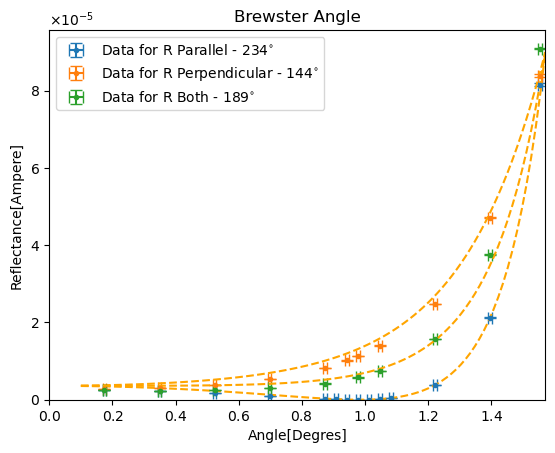

In [161]:
fig = plt.figure()

setups_metadata = ['R Parallel - $234^{\circ}$', 'R Perpendicular - $144^{\circ}$', 'R Both - $189^{\circ}$']
setups_fit = [R_Parallel, R_Perpendicular, R_Both]

theta_fit = np.linspace(0.1, np.pi/2, 100)

for data, metadata, fit_func in zip(setups_data, setups_metadata, setups_fit):

    # Plot Data
    plt.errorbar(data['Angle'], data['Current'], 
                 xerr=data['Angle Error'], yerr=data['Current std'], 
                 capsize=4, fmt=".", label='Data for ' + metadata)
    
    # Fit 
    popt, pcov = curve_fit(fit_func, data['Angle'], data['Current'], bounds=[(1,8*10**(-5)),(2, 10*10**(-5))])
    print("\nsetup - " + metadata +"\n n_t, A:")
    print_fit_parameters(fit_func, popt, pcov, data['Angle'], data['Current'])
    plt.plot(theta_fit, fit_func(theta_fit, *popt), color='orange', linestyle='dashed')
    #plt.plot(theta_fit, fit_func(theta_fit, 1.5), color='orange', linestyle='dashed')

# We see that the 3 graphs produced the same parameters so we take the last ones
n_t = popt[0]
A = popt[1]
n_t_err = pcov[0][0]
A_err = pcov[1][1]

plt.xlim(0, np.pi/2)
plt.ylim(0)
plt.xlabel('Angle[Degres]')
plt.ylabel('Reflectance[Ampere]')
plt.ticklabel_format(useMathText=True)
plt.title('Brewster Angle')
plt.legend()
plt.show()

We found that the plate has fraction index of n=1.5 .</br>
from there we can find Brewster's anglse in two different ways:
* from the equation $ \tan{\theta _p}=\frac{n_t}{n_{}air} $
* from the minimus of R-Parralel

In [165]:
print(np.rad2deg(np.arctan(n_t/1)))

print(np.rad2deg(theta_fit[np.argmin(R_Parallel(theta_fit, n_t, A))]))


56.309932474020215
55.9513446267912
